In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Titanic_Data.csv', sep = ',')

In [ ]:
display(titanic_df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Embarked - Southampton(S) [UK] on 10 April 1912, Titanic called at Cherbourg(C) in France and Queenstown (Q) in Ireland, before heading west to New York.

In [ ]:
# count of Missing Values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df.shape

(891, 12)

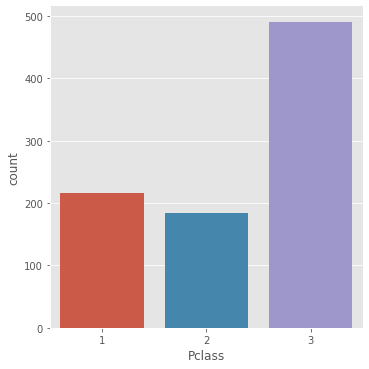

In [ ]:
# Observation: Most passengers are travelling in 3rd Class
plt.style.use('ggplot')
sns.catplot(x = 'Pclass', kind = 'count', data = titanic_df)\

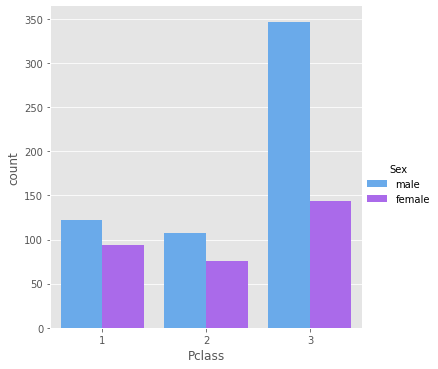

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'Pclass', kind = 'count', hue = 'Sex', data = titanic_df, palette='cool')

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

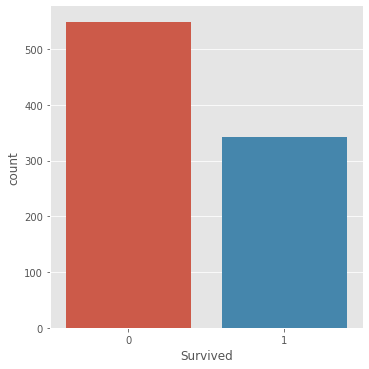

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'Survived', kind = 'count', data = titanic_df)
plt.show()

In [ ]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

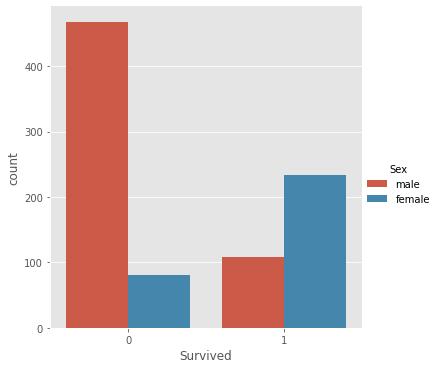

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'Survived', kind = 'count', hue = 'Sex', data = titanic_df)
plt.show()

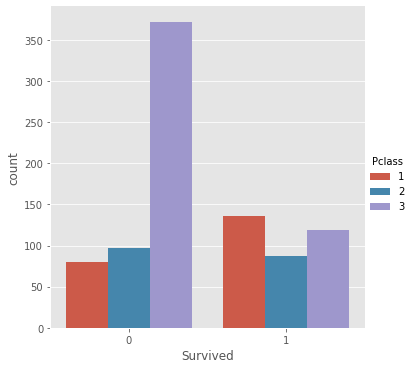

In [ ]:
plt.style.use('ggplot')
sns.catplot(x = 'Survived', kind = 'count', hue = 'Pclass', data = titanic_df)
plt.show() 

In [ ]:
titanic_df['Age'].median()

28.0

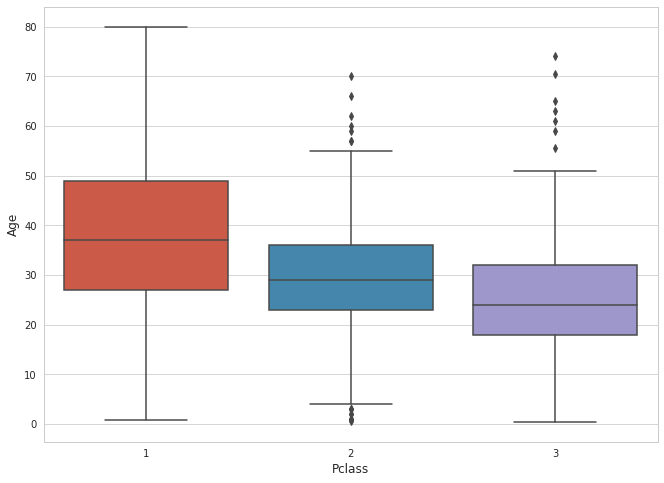

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(11,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_df)
plt.show()

In [ ]:
  titanic_df[titanic_df['Pclass'] == 1]['Age'].mean()

38.233440860215055

In [ ]:
titanic_df[titanic_df['Pclass'] == 1]['Age'].median()

37.0

**Simple Imputer**

In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return titanic_df[titanic_df['Pclass'] == 1]['Age'].median()
    elif Pclass == 2:
      return titanic_df[titanic_df['Pclass'] == 2]['Age'].median()
    else:
      return titanic_df[titanic_df['Pclass'] == 3]['Age'].median()
  else:
    return Age

In [ ]:
# .apply(function_name)
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(impute_age, axis = 1)

In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Continious data replaced by 'mean', discrete data replaced by 'median'

In [ ]:
titanic_df.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
# dropna() - drop missing rows with NaN 
titanic_df.dropna(inplace=True)

In [ ]:
titanic_df.shape

(889, 11)

In [ ]:
# titanic_df['Embarked'].fillna('S'), titanic_df.bfill(), titanic_df.ffill()

In [ ]:
# One-Hot Encoding
sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
# One - Hot Encoding
embarked = pd.get_dummies(titanic_df['Embarked'], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
# Concat of all multiple data frame 
titanic_df2 = pd.concat([titanic_df , sex, embarked], axis = 1)
titanic_df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [ ]:
titanic_df2.drop(['PassengerId', 'Name', 'Ticket', 'Embarked', 'Sex'], axis = 1, inplace = True)

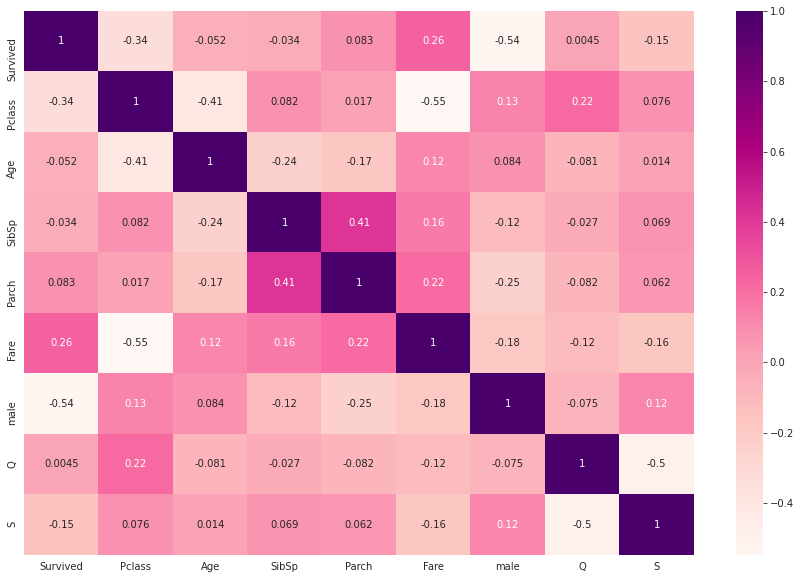

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(titanic_df2.corr(), annot = True, cmap = 'RdPu')
plt.show()

In [ ]:
X = titanic_df2.drop(['Survived'], axis = 1) 
Y = titanic_df2['Survived']

**Features**

In [ ]:
# Cross-Validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# C = Higher the better, max_iter =
logit_model = LogisticRegression(C = 1e6, max_iter = 1e8, solver = 'lbfgs')

In [ ]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000000.0, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
# Accuracy
logit_model.score(X_test, Y_test)

0.8651685393258427

### Classification Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = logit_model.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0])

In [ ]:
confusion_matrix(Y_test, predictions)

array([[108,  11],
       [ 13,  46]])

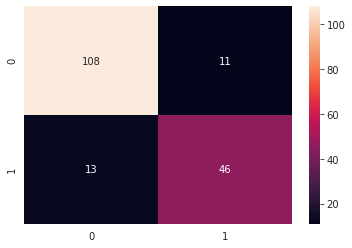

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, fmt = '0.0f')

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       119
           1       0.81      0.78      0.79        59

    accuracy                           0.87       178
   macro avg       0.85      0.84      0.85       178
weighted avg       0.86      0.87      0.86       178



**Making New Predictions**

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [ ]:
X_Jack = [[3, 22, 0, 0, 7.925, 1, 0, 1]]
X_Rose = [[1, 24, 1, 0, 71.925, 0, 0, 1]]

In [ ]:
logit_model.predict(X_Jack)

array([0])

In [ ]:
logit_model.predict(X_Rose)

array([1])